In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
from IPython.core.display import display, HTML

In [2]:
def preprocess(file_name):
    results = []
    with open(file_name) as csvfile:
        wine_reader = csv.reader(csvfile, dialect="excel", delimiter=';')
        for row in wine_reader:
            results.append(row)
    name_features = results[0]
    #print(name_features)
    parsed_results = []
    for row in results[1:]:
        new_row = []
        for num in row:
            new_row.append(float(num))
        parsed_results.append(new_row)
    parsed_results = np.array(parsed_results)
    n_instances = parsed_results.shape[0]
    n_features = parsed_results.shape[1] - 1
    labels = parsed_results[:, n_features]
    instances = parsed_results[:, : n_features]
    return instances, labels
white_instances, white_labels = preprocess('winequality-white.csv')
red_instances, red_labels = preprocess('winequality-red.csv')
white_two_classes = np.array([0 if num <6 else 1 for num in white_labels])
red_two_classes = np.array([0 if num <6 else 1 for num in red_labels])

In [3]:
def three_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score <= 6:
            transformed.append("medium")
        else:
            transformed.append("good")
    return np.array(transformed)
def four_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score == 5:
            transformed.append("medium low")
        elif score == 6:
            transformed.append("medium high")
        else:
            transformed.append("good")
    return np.array(transformed)

In [4]:
white_three_classes = three_classes(white_labels)
red_three_classes = three_classes(red_labels)
white_four_classes = four_classes(white_labels)
red_four_classes = four_classes(red_labels)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # for reporting

In [6]:
svc = svm.SVC()

In [7]:
def tune(params, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    gs = GridSearchCV(clf, param_grid=params, cv=5)
    gs.fit(x_train, y_train)
    return gs.best_params_

In [8]:
params = {'C': [1, 10] ,'gamma': [0.1, 0.001, 0.0001]}
display(HTML('<h3>SVM\'s results of tuning 1 </h3>'))
print("best for white (2 classes)", tune(params, svc, white_instances, white_two_classes))
print("best for white (3 classes)", tune(params, svc, white_instances, white_three_classes))
print("best for white (4 classes)", tune(params, svc, white_instances, white_four_classes))
print("\n")
print("best for red (2 classes)", tune(params, svc, red_instances, red_two_classes))
print("best for red (3 classes)", tune(params, svc, red_instances, red_three_classes))
print("best for red (4 classes)", tune(params, svc, red_instances, red_four_classes))

best for white (2 classes) {'gamma': 0.1, 'C': 10}
best for white (3 classes) {'gamma': 0.1, 'C': 1}
best for white (4 classes) {'gamma': 0.1, 'C': 10}


best for red (2 classes) {'gamma': 0.001, 'C': 10}
best for red (3 classes) {'gamma': 0.1, 'C': 1}
best for red (4 classes) {'gamma': 0.001, 'C': 10}


In [10]:
def produce_report(clf_name, clf, instances, labels):
    x_train, x_test, y_train, y_test = train_test_split(instances, labels)
    clf = clf
    preds = clf.fit(x_train, y_train).predict(x_test)
    display(HTML('<h4>' + clf_name + "'s accuracy: </h4>"))
    print(accuracy_score(y_test, preds))
    display(HTML('<strong>Report</strong>:\n'))
    print(classification_report(y_test, preds), "\n")
    return y_test, preds

In [15]:
display(HTML('<h3>For White Wine: </h3>'))
y_test_white_svm, y_score_white_svm = produce_report('SVM for white wine (2 classes)', 
                                       svm.SVC(gamma = 0.1, C = 10), white_instances, white_two_classes)
produce_report('SVM for white wine (3 classes)', svm.SVC(gamma = 0.1, C = 1), white_instances, white_three_classes)
produce_report('SVM for white wine (4 classes)', svm.SVC(gamma = 0.1, C = 10), white_instances, white_four_classes)
display(HTML('<h3>For Red Wine: </h3>'))
y_test_red_svm, y_score_red_svm = produce_report('SVM for red wine (2 classes)', 
                                       svm.SVC(gamma = 0.001, C = 10), red_instances, red_two_classes)
produce_report('DT for red wine (3 classes)', svm.SVC(gamma = 0.1, C=1), red_instances, red_three_classes)
produce_report('DT for red wine (4 classes)', svm.SVC(gamma= 0.001, C =10), red_instances, red_four_classes)

0.762448979592


             precision    recall  f1-score   support

          0       0.66      0.55      0.60       397
          1       0.80      0.86      0.83       828

avg / total       0.76      0.76      0.76      1225
 



0.795918367347


             precision    recall  f1-score   support

        bad       0.33      0.03      0.05        39
       good       0.72      0.34      0.46       266
     medium       0.81      0.96      0.88       920

avg / total       0.77      0.80      0.76      1225
 



0.602448979592


             precision    recall  f1-score   support

        bad       0.45      0.18      0.26        50
       good       0.56      0.56      0.56       259
medium high       0.61      0.69      0.65       549
 medium low       0.64      0.56      0.59       367

avg / total       0.60      0.60      0.60      1225
 



0.72


             precision    recall  f1-score   support

          0       0.71      0.71      0.71       192
          1       0.73      0.73      0.73       208

avg / total       0.72      0.72      0.72       400
 



0.8175


             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        11
       good       0.33      0.13      0.18        55
     medium       0.85      0.96      0.90       334

avg / total       0.75      0.82      0.78       400
 



0.5875


             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        19
       good       0.67      0.04      0.08        47
medium high       0.59      0.59      0.59       180
 medium low       0.58      0.82      0.68       154

avg / total       0.57      0.59      0.54       400
 



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array(['medium high', 'medium high', 'medium high', 'medium low',
        'medium low', 'medium high', 'medium high', 'medium low',
        'medium high', 'medium high', 'medium low', 'medium low',
        'medium low', 'good', 'medium low', 'good', 'good', 'medium high',
        'medium high', 'medium high', 'medium high', 'medium high',
        'medium high', 'medium low', 'good', 'medium low', 'medium high',
        'medium high', 'medium low', 'bad', 'medium low', 'medium high',
        'medium low', 'medium low', 'medium low', 'good', 'medium low',
        'medium high', 'medium low', 'medium high', 'medium high',
        'medium low', 'medium low', 'medium high', 'medium low',
        'medium high', 'good', 'medium high', 'medium low', 'good',
        'medium low', 'medium low', 'medium high', 'medium low',
        'medium high', 'medium high', 'medium low', 'medium low',
        'medium high', 'medium low', 'medium high', 'good', 'medium low',
        'medium high', 'medium low

# ROC Curve

In [16]:
# Compute ROC curve and ROC area for each class
def draw_curve(title, y_test, y_preds):    
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

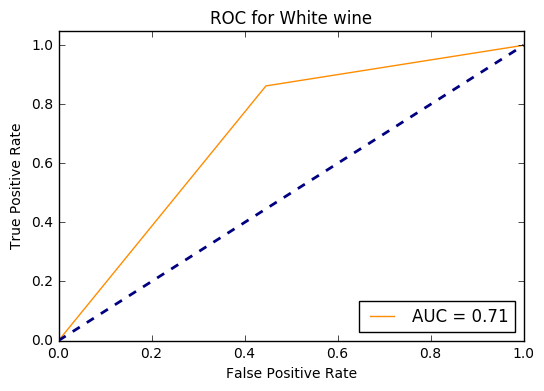

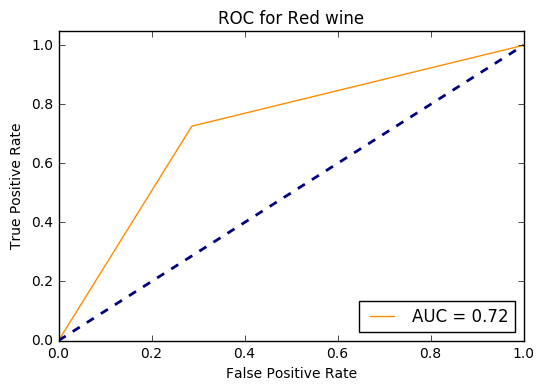

In [18]:
draw_curve('ROC for White wine', y_test_white_svm, y_score_white_svm)
draw_curve('ROC for Red wine', y_test_red_svm, y_score_red_svm)

In [28]:
scaler.fit(X_train_red)
scaler.fit(X_test_red)
normalised_X_train_red = scaler.transform(X_train_red)
normalised_X_test_red = scaler.transform(X_test_red)

In [31]:
svm_clf_rbf = svm.SVC(kernel = 'rbf')
svm_clf_linear = svm.SVC(kernel = 'linear')
svm_clf_poly= svm.SVC(kernel = 'poly')
svm_clf_sigmoid = svm.SVC(kernel = 'sigmoid')


svm_clf_rbf.fit(normalised_X_train_red,y_train_red)
svm_clf_linear.fit(normalised_X_train_red,y_train_red)
svm_clf_poly.fit(normalised_X_train_red,y_train_red)
svm_clf_sigmoid.fit(normalised_X_train_red,y_train_red)

def report_accuracy(moment, clf_name, clf, x_train, y_train):
    cv_error = cross_val_score(clf, x_train, y_train, scoring="accuracy", cv=4)
    print(moment + " customisation, average accuracy of " + clf_name + " : ", cv_error.mean(), " standard deviation: ", np.std(cv_error))

report_accuracy("Before", "SVM_SVC_RBF", svm_clf_rbf, normalised_X_train_red, y_train_red) 
report_accuracy("Before", "SVM_SVC_LINEAR", svm_clf_linear, normalised_X_train_red, y_train_red) 
report_accuracy("Before", "SVM_SVC_POLY", svm_clf_poly, normalised_X_train_red, y_train_red) 
report_accuracy("Before", "SVM_SVC_SIGMOID", svm_clf_sigmoid, normalised_X_train_red, y_train_red) 


Before customisation, average accuracy of SVM_SVC_RBF :  0.769813266444  standard deviation:  0.036709873706
Before customisation, average accuracy of SVM_SVC_LINEAR :  0.737288182832  standard deviation:  0.0304320948325
Before customisation, average accuracy of SVM_SVC_POLY :  0.730613154961  standard deviation:  0.0446553968255
Before customisation, average accuracy of SVM_SVC_SIGMOID :  0.674751950948  standard deviation:  0.0252765949013
